In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pyramid.arima import auto_arima

/home/cleano/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/cleano/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/home/cleano/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmda

In [2]:
base =  pd.read_csv("AirPassengers.csv")

In [3]:
dateParse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ["Month"], 
                   index_col= "Month", date_parser= dateParse)

In [4]:
#serie temporal
ts = base['#Passengers']

/home/cleano/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


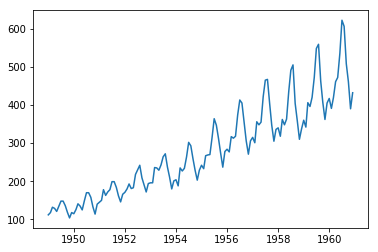

In [5]:
plt.plot(ts)

In [6]:
modelo = ARIMA(ts, order=(2,1,2))
modelo_treinado = modelo.fit()

/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [7]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.716
Date:                Wed, 04 Dec 2019   AIC                           1344.043
Time:                        20:53:56   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9097      0.065    -29.503      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9995      0.068     14.807      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0002           -0.0479
MA.2            0.9553           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [8]:
#steps = previsões
previsoes = modelo_treinado.forecast(steps = 12)[0]

In [9]:
previsoes

array([433.13422182, 450.91903911, 479.85428659, 512.02032366,
       539.36963887, 555.8442862 , 558.78084857, 549.29983462,
       531.66962729, 511.90433422, 496.03186256, 488.51530253])

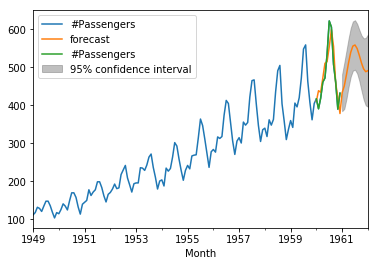

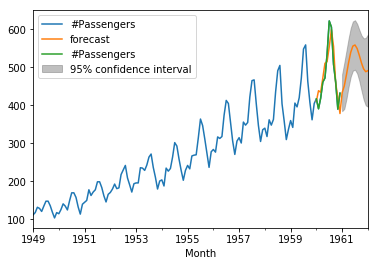

In [10]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1962-01-01', ax = eixo
                             , plot_insample= True)

In [11]:
modelo_auto = auto_arima(ts, m = 12, sesonal = True, trace = True)

/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=1154.503, BIC=1178.206, Fit time=1.692 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.010 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1145.852, BIC=1157.703, Fit time=0.550 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.474 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1403.473, BIC=1412.361, Fit time=0.055 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 0, 12); AIC=1146.202, BIC=1161.016, Fit time=1.403 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=1146.630, BIC=1161.444, Fit time=0.978 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 0, 1, 12); AIC=1146.557, BIC=1164.334, Fit time=1.782 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1152.734, BIC=1161.623, Fit time=0.459 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=1147.809, BIC=1162.624, Fit time=0.856 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1137.810, BIC=1152.624, Fit time=1.211 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=1142.341, BIC=1163.081, Fit time=1.989 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1396.121, BIC=1407.972, Fit time=0.153 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 0, 12); AIC=1138.335, BIC=1156.112, Fit time=2.601 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=1148.607, BIC=1166.384, Fit time=1.019 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 12); AIC=1147.593, BIC=1168.333, Fit time=3.691 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1146.153, BIC=1158.004, Fit time=0.766 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 0, 12); AIC=1142.509, BIC=1160.287, Fit time=1.378 seconds


/home/cleano/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 0, 12); AIC=1144.209, BIC=1161.986, Fit time=1.457 seconds
Total fit time: 22.550 seconds


In [12]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -563.905
Date:                            Wed, 04 Dec 2019   AIC                           1137.810
Time:                                    20:55:14   BIC                           1152.624
Sample:                                         0   HQIC                          1143.829
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0324      0.018      1.822      0.069      -0.002       0.067
ar.L1          0.7660      0.070     10.944      0.000       0.629       0.903
ma.L1         -0.9997      0.288     -3.474      0.001      -1.564      -0.436
ar.S.L12       0.9464      0.024     39.226      0.000       0.899       0.994
sigma2       130.6322     34.309      3.807      0.000      63.387     197.877
===================================================================================
Ljung-Box (Q):                       56.91   Jarque-Bera (JB):                23.90
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.36   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
proximos_12 = modelo_auto.predict(n_periods = 12)

In [15]:
proximos_12

array([445.0273615 , 421.73273651, 449.26972042, 489.8461341 ,
       500.92271939, 561.08922258, 643.87503002, 629.10815475,
       536.68015674, 492.47658345, 425.5266068 , 465.49605239])